### Project Objectives:
- In this project I aim to predict the median housing value using neural network model in Keras
- Author: Carlos Caballero - Data Scientist
- Dataset: CA housing dataset obtained from https://raw.githubusercoent.com/ageron/hansdon-ml2/master/datasets/housing
- Models: Multilayer Perceptron (MLP), with stochastic gradient descent (SGD), no activation function due to single output 
- Method: Fit images and evaluate performance

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import sklearn
import csv
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [18]:
# Option 1 to train model without wide and deep path

#input_ = keras.layers.Input(shape=X_train.shape[1:])
#hidden1 = keras.layers.Dense(30, activation='relu')(input_)
#hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
#concat = keras.layers.Concatenate()([input_, hidden2])
#output = keras.layers.Dense(1)(concat)

#model = keras.Model(inputs=[input_], outputs=[output])

In [45]:
# Option 2 with wide and deep path

input_A = keras.layers.Input(shape=[8], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)

# Specify inputs and output layers
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [46]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

X_train_A, X_train_B = X_train[:, :8], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :8], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :8], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [47]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data = ((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.8577 - accuracy: 0.0030 - val_loss: 0.5314 - val_accuracy: 0.0039
Epoch 2/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.6950 - accuracy: 0.0030 - val_loss: 0.6430 - val_accuracy: 0.0039
Epoch 3/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.6691 - accuracy: 0.0030 - val_loss: 0.4903 - val_accuracy: 0.0041
Epoch 4/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5981 - accuracy: 0.0028 - val_loss: 0.8396 - val_accuracy: 0.0039
Epoch 5/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4649 - accuracy: 0.0029 - val_loss: 1.0718 - val_accuracy: 0.0041
Epoch 6/20
11610/11610 [==============================] - 0s 31us/sample - loss: 1.0525 - accuracy: 0.0029 - val_loss: 0.5896 - val_accuracy: 0.0036
Epoch 7/20
11610/11610 [==============================] -

In [48]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

5160/5160 [==============================] - 0s 18us/sample - loss: 104.0489 - accuracy: 0.0017


In [49]:
y_pred = model.predict((X_new_A, X_new_B))

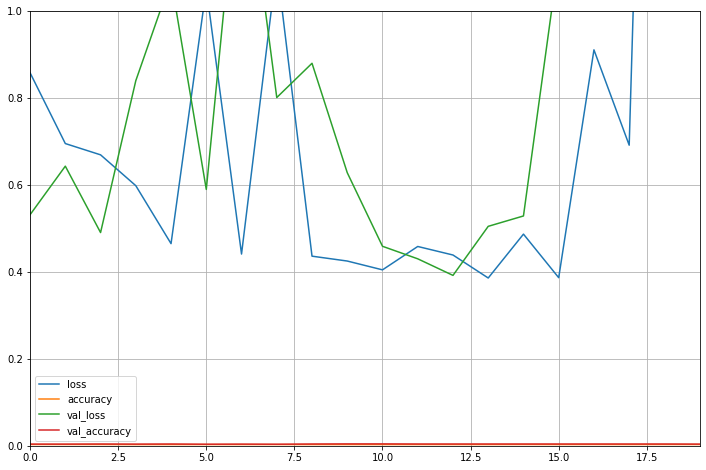

In [50]:
# Visualize model
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1) #set vertical range to [0-1]
plt.show()

### Accuracy is low, need to build a more complex network 

In [ ]:
# Save model

model.save('regression_MLP_CA_housing')

In [ ]:
# Load model
model2 = keras.models.load_model('regression_MLP_CA_housing')